# Data Processing

### Main changes
1. **Time-dependent travel speeds**: Each arc is assigned one of three congestion profiles (high, normal, low).
2. **Non-linear charging functions**: Each charging station is assigned a mode (slow, medium, fast) that defines a piecewise-linear charging function.
3. **Time-dependent waiting times**: A waiting-time pattern at charging stations is implemented, as in Figure 5c.


In [1]:
# Libraries import
import os
import random
import numpy as np
import re
import matplotlib.pyplot as plt
import json

In [2]:
# Setup
random.seed(42)
np.random.seed(42)

In [3]:
# Paths configurations
PROJECT_ROOT = ".."
INPUT_DIR = os.path.join(PROJECT_ROOT, "data", "EVRPTW")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "data", "TDEVRPTW")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    

## Parsing instances

In [ ]:
def parse_evrptw_instance(file_path):
    """
    Reads and parses an EVRPTW instance file.
    Returns a dictionary with instance data including nodes, parameters, and distance matrix.
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    instance = {'name': os.path.basename(file_path).split('.')[0]}
    nodes = []
    
    #  c=customer (0), f=charging station (1), d=depot (2)
    type_map = {'c': 0, 'f': 1, 'd': 2}
    
    in_node_section = False
    node_id_counter = 0
    
    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Parsing parameters
        if 'Vehicle fuel tank capacity' in line:
            instance['battery_capacity'] = float(re.search(r'/(.*?)/', line).group(1))
            continue
        if 'Vehicle load capacity' in line:
            instance['vehicle_capacity'] = float(re.search(r'/(.*?)/', line).group(1))
            continue
        if 'fuel consumption rate' in line:
            instance['energy_consumption_rate'] = float(re.search(r'/(.*?)/', line).group(1))
            continue
        if 'inverse refueling rate' in line:
            instance['inverse_recharge_rate'] = float(re.search(r'/(.*?)/', line).group(1))
            continue
            
        # StringID
        if 'StringID' in line and 'Type' in line:
            in_node_section = True
            continue

        # Line parsing for nodes
        if in_node_section:
            try:
                parts = line.split()
                if len(parts) != 8:
                    continue

                node_data = {
                    'string_id': parts[0],
                    'id': node_id_counter,
                    'type': type_map[parts[1]],
                    'x': float(parts[2]),
                    'y': float(parts[3]),
                    'demand': float(parts[4]),
                    'ready_time': float(parts[5]),
                    'due_date': float(parts[6]),
                    'service_time': float(parts[7])
                }
                nodes.append(node_data)
                node_id_counter += 1
            except (ValueError, KeyError, IndexError):
                in_node_section = False
                
    instance['nodes'] = nodes


    # Time Horizon (T) 
    depot_node = next((node for node in instance['nodes'] if node['type'] == 2), None)
    if depot_node:
        instance['T'] = depot_node['due_date']
    else:
        instance['T'] = max(node['due_date'] for node in instance['nodes'] if node['due_date'] > 0)
        
    return instance

In [5]:
# Example of data processing
test_file = os.path.join(INPUT_DIR, "c101_21.txt") 
if os.path.exists(test_file):
    data = parse_evrptw_instance(test_file)

    print(json.dumps(data, indent=2, default=str))
    #json.dump(data, open(os.path.join(OUTPUT_DIR, "c101_21.json"), 'w'), indent=2, default=str)


{
  "name": "c101_21",
  "battery_capacity": 79.69,
  "vehicle_capacity": 200.0,
  "energy_consumption_rate": 1.0,
  "inverse_recharge_rate": 3.39,
  "nodes": [
    {
      "string_id": "D0",
      "id": 0,
      "type": 2,
      "x": 40.0,
      "y": 50.0,
      "demand": 0.0,
      "ready_time": 0.0,
      "due_date": 1236.0,
      "service_time": 0.0
    },
    {
      "string_id": "S0",
      "id": 1,
      "type": 1,
      "x": 40.0,
      "y": 50.0,
      "demand": 0.0,
      "ready_time": 0.0,
      "due_date": 1236.0,
      "service_time": 0.0
    },
    {
      "string_id": "S1",
      "id": 2,
      "type": 1,
      "x": 73.0,
      "y": 52.0,
      "demand": 0.0,
      "ready_time": 0.0,
      "due_date": 1236.0,
      "service_time": 0.0
    },
    {
      "string_id": "S2",
      "id": 3,
      "type": 1,
      "x": 90.0,
      "y": 55.0,
      "demand": 0.0,
      "ready_time": 0.0,
      "due_date": 1236.0,
      "service_time": 0.0
    },
    {
      "string_id": "S3",


In [6]:
temp_dir = os.path.join(PROJECT_ROOT, "data", "temp")

for file in os.listdir(INPUT_DIR):
    if file.endswith(".txt"):
        file_path = os.path.join(INPUT_DIR, file)
        data = parse_evrptw_instance(file_path)
        output_file = os.path.join(temp_dir, file.replace(".txt", ".json"))
        json.dump(data, open(output_file, 'w'), indent=2, default=str)
        print(f"Processed {file} -> {output_file}")

Processed c101C10.txt -> ..\data\temp\c101C10.json
Processed c101C5.txt -> ..\data\temp\c101C5.json
Processed c101_21.txt -> ..\data\temp\c101_21.json
Processed c102_21.txt -> ..\data\temp\c102_21.json
Processed c103C15.txt -> ..\data\temp\c103C15.json
Processed c103C5.txt -> ..\data\temp\c103C5.json
Processed c103_21.txt -> ..\data\temp\c103_21.json
Processed c104C10.txt -> ..\data\temp\c104C10.json
Processed c104_21.txt -> ..\data\temp\c104_21.json
Processed c105_21.txt -> ..\data\temp\c105_21.json
Processed c106C15.txt -> ..\data\temp\c106C15.json
Processed c106_21.txt -> ..\data\temp\c106_21.json
Processed c107_21.txt -> ..\data\temp\c107_21.json
Processed c108_21.txt -> ..\data\temp\c108_21.json
Processed c109_21.txt -> ..\data\temp\c109_21.json
Processed c201_21.txt -> ..\data\temp\c201_21.json
Processed c202C10.txt -> ..\data\temp\c202C10.json
Processed c202C15.txt -> ..\data\temp\c202C15.json
Processed c202_21.txt -> ..\data\temp\c202_21.json
Processed c203_21.txt -> ..\data\te

## Visualization of Time-Dependent Functions

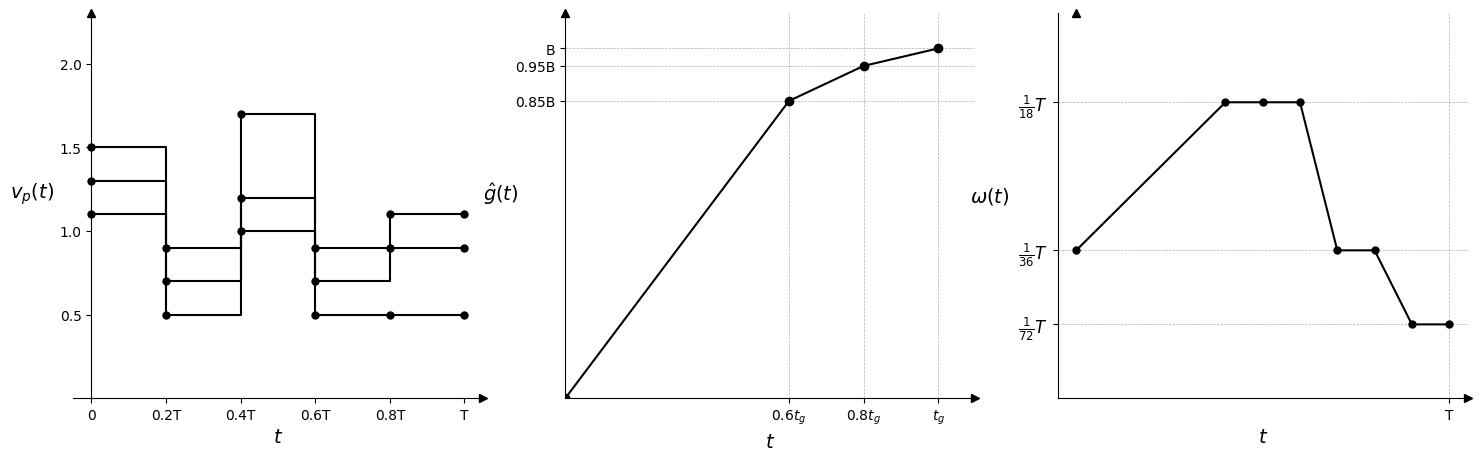

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (as in the original)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# --- 4.1 Figure 5a: Speed Profiles (FIXED: last step closed and axes centered) ---

T_example = 1000  # Example time horizon
time_points = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0]) * T_example

# Profiles faithful to the paper
# NOTE: per request, all three profiles are plotted in BLACK
speed_profiles_data = {
    'high':   {'values': [1.5, 0.5, 1.7, 0.5, 0.5], 'color': 'black'},
    'normal': {'values': [1.3, 0.7, 1.2, 0.7, 0.9], 'color': 'black'},
    'low':    {'values': [1.1, 0.9, 1.0, 0.9, 1.1], 'color': 'black'}
}

for profile_name, data in speed_profiles_data.items():
    # Append the last value to close the final step
    values_ext = data['values'] + [data['values'][-1]]
    ax1.step(time_points, values_ext, where='post', color='black')
    ax1.plot(time_points, values_ext, 'o', color='black', markersize=5)

# Styling and axes
ax1.set_xlabel("$t$", fontsize=14)
ax1.set_ylabel("$v_p(t)$", rotation=0, fontsize=14, labelpad=20)
ax1.set_xticks(time_points)
ax1.set_xticklabels(['0', '0.2T', '0.4T', '0.6T', '0.8T', 'T'])
ax1.set_yticks([0.5, 1, 1.5, 2])
ax1.set_ylim(0, 2.3)
ax1.set_xlim(-0.05 * T_example, 1.05 * T_example)

# Remove grid and style like in the paper
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')

# Add axis arrows
ax1.plot(1, 0, ">k", transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot(0, 1, "^k", transform=ax1.get_xaxis_transform(), clip_on=False)


# --- 4.2 Figure 5b: Charging Function (UNCHANGED) ---

B_example = 100 
tg_example = 100 

charge_time_points = [0, 0.6*tg_example, 0.8*tg_example, tg_example]
charge_level_points = [0, 0.85*B_example, 0.95*B_example, B_example]

ax2.plot(charge_time_points, charge_level_points, marker='o', color='black')

# Styling and labels
ax2.set_xlabel("$t$", fontsize=14)
ax2.set_ylabel("$\\hat{g}(t)$", rotation=0, fontsize=14, labelpad=10)
ax2.set_xticks([0.6*tg_example, 0.8*tg_example, tg_example])
ax2.set_xticklabels(['$0.6t_g$', '$0.8t_g$', '$t_g$'])
ax2.set_yticks([0.85*B_example, 0.95*B_example, B_example])
ax2.set_yticklabels(['0.85B', '0.95B', 'B'])
ax2.set_ylim(0, B_example * 1.1)
ax2.set_xlim(0, tg_example * 1.1)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('zero')
ax2.plot(1, 0, ">k", transform=ax2.get_yaxis_transform(), clip_on=False)
ax2.plot(0, 1, "^k", transform=ax2.get_xaxis_transform(), clip_on=False)


# --- 4.3 Figure 5c: Waiting Function  ---

# Key points closely matching the figure
wait_x_points = np.array([0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) * T_example
wait_y_values = np.array([1/36, 1/18, 1/18, 1/18, 1/36, 1/36, 1/72, 1/72]) * T_example

ax3.plot(wait_x_points, wait_y_values, color='black')
ax3.plot(wait_x_points, wait_y_values, 'o', color='black', markersize=5)  # Markers on key points

# Styling and labels
ax3.set_xlabel("$t$", fontsize=14)
ax3.set_ylabel("$\\omega(t)$", rotation=0, fontsize=14, labelpad=20)
ax3.set_xticks([T_example])
ax3.set_xticklabels(['T'])
y_ticks_values = np.array([1/72, 1/36, 1/18]) * T_example
y_ticks_labels = ['$\\frac{1}{72}T$', '$\\frac{1}{36}T$', '$\\frac{1}{18}T$']
ax3.set_yticks(y_ticks_values)
ax3.set_yticklabels(y_ticks_labels, fontsize=12)
ax3.set_ylim(0, T_example * (1/18) * 1.3)
ax3.set_xlim(-0.05 * T_example, 1.05 * T_example)
ax3.grid(True, linestyle='--', linewidth=0.5)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_position('zero')
ax3.plot(1, 0, ">k", transform=ax3.get_yaxis_transform(), clip_on=False)
ax3.plot(0, 1, "^k", transform=ax3.get_xaxis_transform(), clip_on=False)

plt.show()


## Processing parsed instances

In [14]:
def add_time_dependent_features(instance_data):
    """
    Implements the logic to add time-dependent features to the instance data.
    """
    num_nodes = len(instance_data['nodes'])
    
    # Velocity profiles for arcs
    # Each (i, j) is assigned randomly to one of the three profiles.
    profiles = ['high', 'normal', 'low']
    arc_speed_profiles = np.random.choice(profiles, size=(num_nodes, num_nodes))
    instance_data['arc_speed_profiles'] = arc_speed_profiles
    
    # Charging modalities
    # Assigns a charging mode to each station
    # (fast, medium, slow).
    station_modes = {}
    modes = ['fast', 'medium', 'slow']
    station_ids = [node['id'] for node in instance_data['nodes'] if node['type'] == 1]
    
    for station_id in station_ids:
        station_modes[station_id] = random.choice(modes)
    instance_data['station_modes'] = station_modes
    
    # Waiting time  (TD-Smooth-Long)
    instance_data['waiting_time_pattern'] = 'TD-Smooth-Long'
    
    return instance_data

## Writing function

In [ ]:
def write_tdevrptw_instance_json(instance_data, output_path):

    T = instance_data['T']
    B = instance_data['battery_capacity']
    t_g_medium = B * instance_data.get('inverse_recharge_rate', 0)

    output_json = {
        "name": f"{instance_data['name']}_TD",
        "parameters": {
            "vehicle_capacity": instance_data['vehicle_capacity'],
            "battery_capacity": B,
            "energy_consumption_rate": instance_data['energy_consumption_rate'],
            "planning_horizon_T": T
        },
        "nodes": [
            {
                "id": node['id'],
                "string_id": node['string_id'],
                "type": node['type'], 
                "coords": {"x": node['x'], "y": node['y']},
                "demand": node['demand'],
                "time_window": {"start": node['ready_time'], "end": node['due_date']},
                "service_time": node['service_time']
            } for node in instance_data['nodes']
        ],
        "time_dependent_definitions": {
            "speed_profiles": {

                "time_intervals_factors": [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
                "profiles": {
                    'high':   [1.5, 0.5, 0.5, 1.7, 0.8],
                    'normal': [1.3, 0.7, 0.7, 1.2, 0.9],
                    'low':    [1.1, 0.9, 1.0, 0.9, 1.1]
                }
            },
            "recharge_functions": {

                'fast': [
                    [0, 0], 
                    [0.6 * (0.5 * t_g_medium), 0.85 * B],
                    [0.8 * (0.5 * t_g_medium), 0.95 * B],
                    [1.0 * (0.5 * t_g_medium), B]
                ],
                'medium': [
                    [0, 0], 
                    [0.6 * t_g_medium, 0.85 * B],
                    [0.8 * t_g_medium, 0.95 * B],
                    [t_g_medium, B]
                ],
                'slow': [
                    [0, 0], 
                    [0.6 * (2.0 * t_g_medium), 0.85 * B],
                    [0.8 * (2.0 * t_g_medium), 0.95 * B],
                    [1.0 * (2.0 * t_g_medium), B]
                ]
            },
            "waiting_function": {
 
                "pattern": "TD-Smooth-Long",
                "points": [
                    [0.0 * T, (1/36) * T],
                    [0.4 * T, (1/36) * T],
                    [0.5 * T, (1/18) * T],
                    [0.6 * T, (1/18) * T],
                    [0.7 * T, (1/36) * T],
                    [0.8 * T, (1/36) * T],
                    [0.9 * T, (1/72) * T],
                    [1.0 * T, (1/72) * T]
                ]
            }
        },
        "time_dependent_assignments": {
            
            "station_recharge_modes": {str(k): v for k, v in instance_data['station_modes'].items()},
            "arc_speed_profiles": instance_data['arc_speed_profiles'].tolist()
        }
    }
    
    with open(output_path, 'w') as f:
        json.dump(output_json, f, indent=4)

In [ ]:
if __name__ == "__main__":
    
    input_files = [f for f in os.listdir(INPUT_DIR) if f.endswith('.txt')]

    if not input_files:
        pass
    else:
        for filename in sorted(input_files):
            input_file_path = os.path.join(INPUT_DIR, filename)
 
            output_file_path = os.path.join(OUTPUT_DIR, filename.replace('.txt', '_td.json'))
            
            print(f"Processing {filename}...")
            
            instance_data = parse_evrptw_instance(input_file_path)
            td_instance_data = add_time_dependent_features(instance_data)
            write_tdevrptw_instance_json(td_instance_data, output_file_path)
            

Processing c101C10.txt...
 -> Salvato in ..\data\TDEVRPTW\c101C10_td.json
Processing c101C5.txt...
 -> Salvato in ..\data\TDEVRPTW\c101C5_td.json
Processing c101_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c101_21_td.json
Processing c102_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c102_21_td.json
Processing c103C15.txt...
 -> Salvato in ..\data\TDEVRPTW\c103C15_td.json
Processing c103C5.txt...
 -> Salvato in ..\data\TDEVRPTW\c103C5_td.json
Processing c103_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c103_21_td.json
Processing c104C10.txt...
 -> Salvato in ..\data\TDEVRPTW\c104C10_td.json
Processing c104_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c104_21_td.json
Processing c105_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c105_21_td.json
Processing c106C15.txt...
 -> Salvato in ..\data\TDEVRPTW\c106C15_td.json
Processing c106_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c106_21_td.json
Processing c107_21.txt...
 -> Salvato in ..\data\TDEVRPTW\c107_21_td.json
Processing c108_21.txt...
 -> Salvato in .